# RFM Customer Value

In [1]:
import pandas as pd
import numpy as np

##  a)	Calculate the RFM values for each customer (by customer id).

### Load dataset

In [2]:
retail_df = pd.read_excel( "../data/Online Retail.xlsx",sheet_name="Online Retail" )

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Find if there are any null values in the data and drop the null values

In [4]:
num_recs = retail_df.count()

In [5]:
num_recs

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
retail_df = retail_df.dropna()

retail_df.count()

InvoiceNo      406829
StockCode      406829
Description    406829
Quantity       406829
InvoiceDate    406829
UnitPrice      406829
CustomerID     406829
Country        406829
dtype: int64

### Remove transcations with negative quantity

In [7]:
retail_df = retail_df[retail_df['Quantity'] >= 0]

retail_df.count()

InvoiceNo      397924
StockCode      397924
Description    397924
Quantity       397924
InvoiceDate    397924
UnitPrice      397924
CustomerID     397924
Country        397924
dtype: int64

### Add total price column

In [8]:
retail_df['TotalPrice'] = retail_df.UnitPrice * retail_df.Quantity

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Converting InvoiceDate to pandas datetime format

In [9]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

### Find most recent transaction date

In [10]:
recent_date = retail_df['InvoiceDate'].max()
recent_date

Timestamp('2011-12-09 12:50:00')

### Calculate Recency

###### For calculating recency, we will assume current date as 31/12/2011. The recency value will be how recently the customer bought with respect to 31/12/2011 date.

In [11]:
current_ts = pd.to_datetime('31/12/2011')
current_ts

Timestamp('2011-12-31 00:00:00')

In [12]:
retail_df['Recency'] = (current_ts - retail_df.InvoiceDate).dt.days

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,394
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,394
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,394
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,394
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,394


In [13]:
recency_df = retail_df.groupby('CustomerID')

recency_df = recency_df['Recency'].agg(np.min).to_frame()

recency_df.head()


,Recency
CustomerID,
12346.0,346
12347.0,23
12348.0,96
12349.0,39
12350.0,331


### Calculate Frequency

###### First group all invoices by the line items and then count the number of invoices by each customer.

In [14]:
frequency_df = retail_df.groupby(['CustomerID','InvoiceNo'])['InvoiceNo'].agg({'Frequency':'count'}) \
                        .groupby(['CustomerID']).agg({'Frequency':'count'})

frequency_df.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Frequency
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [15]:
monetary_df = retail_df.groupby(['CustomerID'])['TotalPrice'].agg({'Monetary': 'sum'})

monetary_df.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


### Joining RFM values by customer ID

In [16]:
df = [recency_df, frequency_df, monetary_df]
rfm_df = pd.concat(df, axis=1)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,7,4310.00
12348.0,96,4,1797.24
12349.0,39,1,1757.55
12350.0,331,1,334.40


##  b)	Find top 10 customers based on frequency and monetary value. Sort them based on first frequency and then monetary value.

In [17]:
top_10_freq = rfm_df.sort_values(['Frequency','Monetary'],ascending=[False,False])
top_10_freq.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12748.0,21,210,33719.73
14911.0,22,201,143825.06
17841.0,22,124,40991.57
13089.0,23,97,58825.83
14606.0,22,93,12156.65
15311.0,21,91,60767.90
12971.0,24,86,11189.91
14646.0,22,74,280206.02
16029.0,59,63,81024.84


##  c)	Find optimal number of segments using dendogram and elbow method.

In [18]:
from sklearn.cluster import KMeans

In [19]:
rfm_df.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [20]:
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
X.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,7,4310.00
12348.0,96,4,1797.24
12349.0,39,1,1757.55
12350.0,331,1,334.40


### Normalizing the features

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
type(X_scaled)

numpy.ndarray

In [22]:
A = pd.DataFrame(X_scaled,columns=X.columns)
A.head()

,Recency,Frequency,Monetary
0,2.329673,-0.424675,8.359634
1,-0.900449,0.354080,0.251046
2,-0.170421,-0.035297,-0.028546
3,-0.740443,-0.424675,-0.032963
4,2.179667,-0.424675,-0.191315


### Finding how many clusters might exist based on dendograms

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


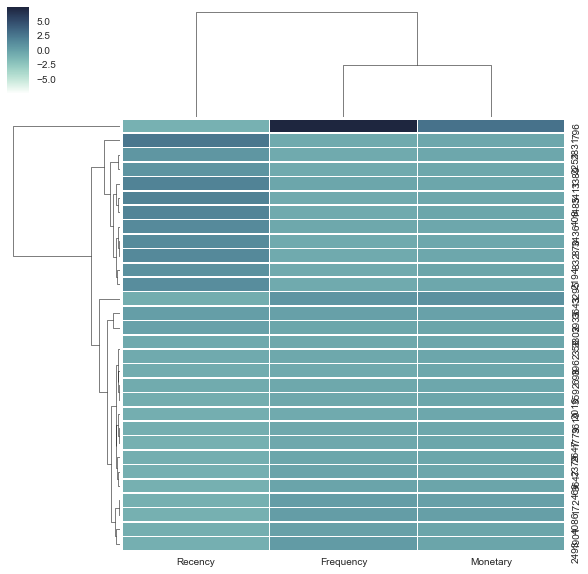

In [23]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(A.sample(30), cmap=cmap, linewidths=.5)

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


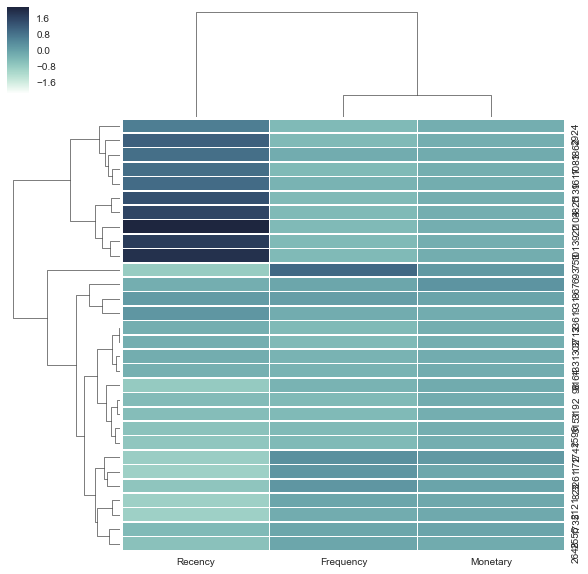

In [24]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sn.clustermap(A.sample(30), cmap=cmap, linewidths=.5)

#### From the dendogram we can infer that 3 or 4 clusters are required

### Elbow analysis

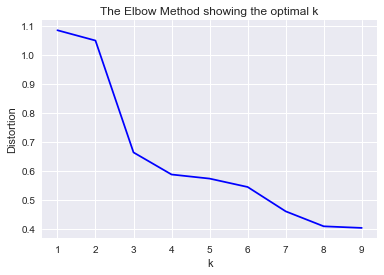

In [25]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_scaled)
    kmeanModel.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### From the elbow method we can infer that 3 clusters are required

##  d)	Create final segment of customers and label the customers based on which segment they belong to. 

In [26]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
clusters.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [28]:
rfm_df["cluster_id"] = clusters.labels_

In [29]:
rfm_df.head()

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12346.0,346,1,77183.60,2
12347.0,23,7,4310.00,0
12348.0,96,4,1797.24,0
12349.0,39,1,1757.55,0
12350.0,331,1,334.40,2


In [30]:
rfm_df.cluster_id.unique()

array([2, 0, 1], dtype=int64)

In [31]:
clusters.cluster_centers_

array([[-0.51221653,  0.05257211, -0.0218781 ],
       [-0.86583208,  8.07673458,  9.32998501],
       [ 1.54086676, -0.34921133, -0.15823447]])

In [32]:
rfm_df.groupby('cluster_id' ).mean()

,Recency,Frequency,Monetary
cluster_id,,,
0,61.821761,4.676999,1857.169902
1,26.461538,66.500000,85904.351538
2,267.122355,1.581417,631.706220


## e)Explain each segment intuitively. 

### Looking at each segment one by one

In [33]:
rfm_0 = rfm_df[rfm_df.columns][rfm_df.cluster_id == 0]
rfm_0.head(20)

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12347.0,23,7,4310.00,0
12348.0,96,4,1797.24,0
12349.0,39,1,1757.55,0
12352.0,57,8,2506.04,0
12356.0,43,3,2811.43,0
12357.0,54,1,6207.67,0
12358.0,22,2,1168.06,0
12359.0,78,4,6372.58,0
12360.0,73,3,2662.06,0


### This is a segment of customers, who have not visited the online retail in the recent times.As we can see that the recency count is very large.Also, these are not frequent customers, as their frequency rate is very low. The monetary value of these customers is also very low.These customers have not added too much value to the online retail business.

In [34]:
rfm_1 = rfm_df[rfm_df.columns][rfm_df.cluster_id == 1]
rfm_1.head(20)

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12415.0,45,21,124914.53,1
12748.0,21,210,33719.73,1
12971.0,24,86,11189.91,1
13089.0,23,97,58825.83,1
13408.0,22,62,28117.04,1
13694.0,24,50,65039.62,1
13798.0,22,57,37153.85,1
14096.0,25,17,65164.79,1
14156.0,30,55,117379.63,1


### This segment include customers who have made moderate number of purchases in the recent times.These are the customers who are not very frequent , but have added the monetary value.
### There are potential new customers in this segment who can be adding more value to the business, by making more purchases in the future. Thus I believe the company must target these customers to increase their profits.

In [35]:
rfm_2 = rfm_df[rfm_df.columns][rfm_df.cluster_id == 2]
rfm_2.head(20)

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12346.0,346,1,77183.60,2
12350.0,331,1,334.40,2
12353.0,225,1,89.00,2
12354.0,253,1,1079.40,2
12355.0,235,1,459.40,2
12361.0,308,1,189.90,2
12365.0,312,2,641.38,2
12373.0,332,1,364.60,2
12377.0,336,2,1628.12,2


### This segment has very frequent, recent and high monetary value customers. These customers are very high valued customers to the company.